In [1]:
from main import *
import time as time

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [8]:
print(connected)

False


In [7]:
cell.show_reactions()

Reaction Type          Reactants    Enzymes    Products
---------------------  -----------  ---------  ----------
catalytic_degradation  [4]          [2]        []


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
repression                     3                       4
repression                     3                       0
activation                     1                       4


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

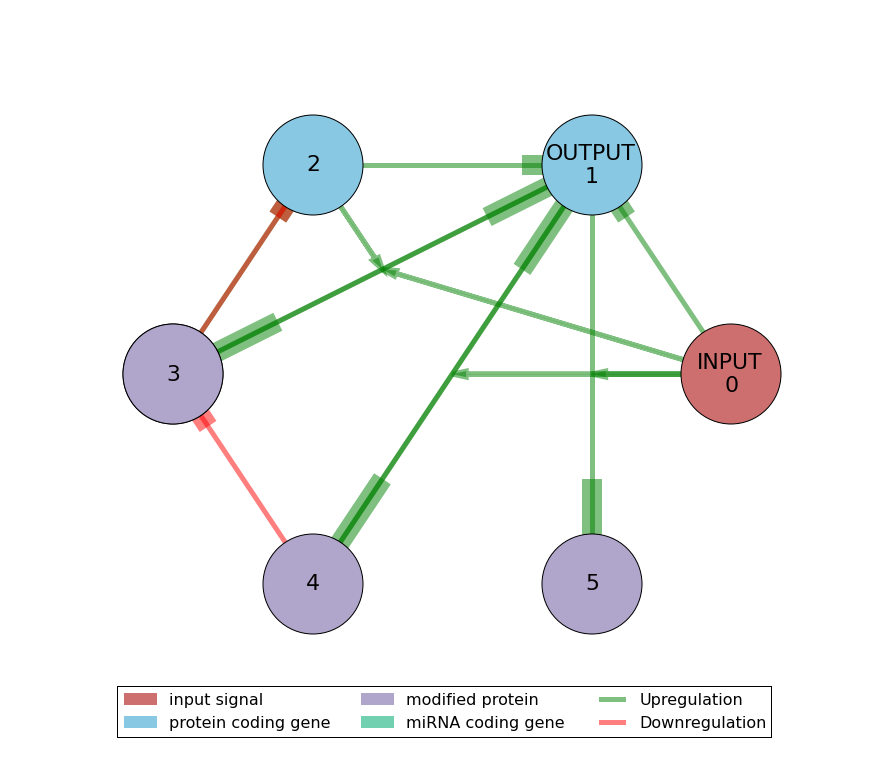

In [30]:
# sequentially mutate cell
cell = Cell(1, permanent_genes=2, input_nodes=1)

for _ in range(0, 500):
    _, cell = cell.divide(20)
    connected = cell.prune_graph(input_node=0)
    print(connected)

if connected is True:    
    cell.show_topology(output_node=2)

pruned list: {5, 6, 9, 18, 19, 20, 21, 22, 23, 25, 28, 29, 30, 31, 32, 33, 34}
pruned genes: [33, 5, 18, 20, 22, 25, 28, 30]
pruned proteins: [32, 34, 6, 9, 19, 21, 23, 29, 31]


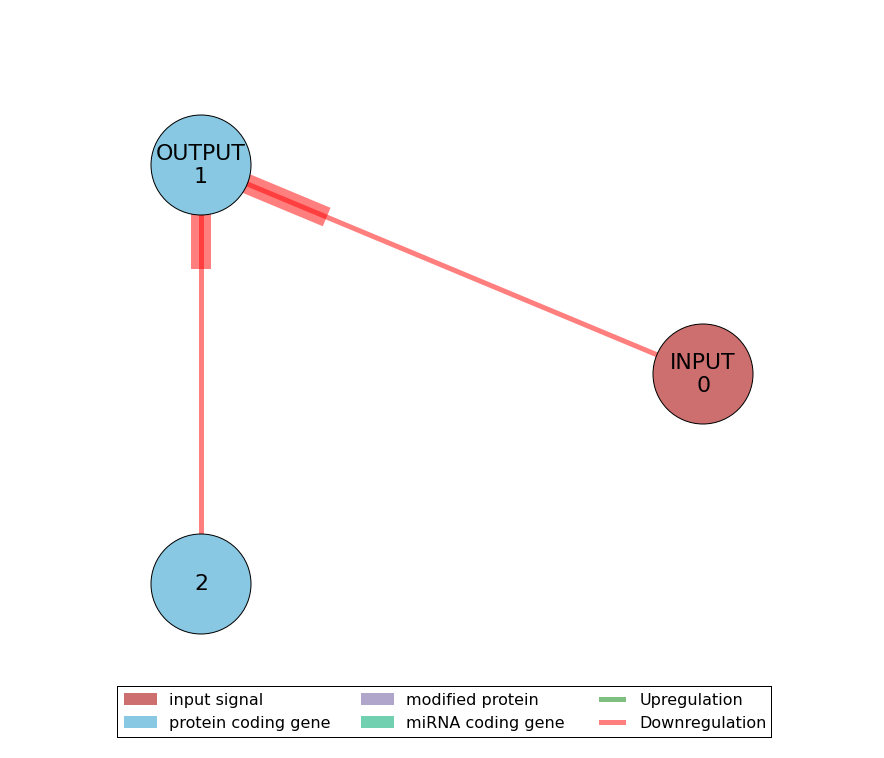

In [33]:
connected = cell.prune_graph(input_node=0)
cell.show_topology(output_node=2)

In [19]:
print(cell.coding_rnas)
print(cell.non_coding_rnas)
print(cell.removable_genes)

[1, 3, 11, 14]
[8, 9, 10]
[11, 14]


In [84]:
cell.show_reactions(grn_indices=True)

Reaction Type          Reactants    Enzymes    Products
---------------------  -----------  ---------  ----------
catalytic_degradation  [7]          [6]        []
miRNA_silencing        [8, 8]       []         []
catalytic_degradation  [4]          [3]        []


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
activation                     1                       1
repression                     1                       2
activation                     2                       1
activation                     3                       3
activation                     5                       3
activation                     4                       2
repression                     8                       3
repression                     2                       4


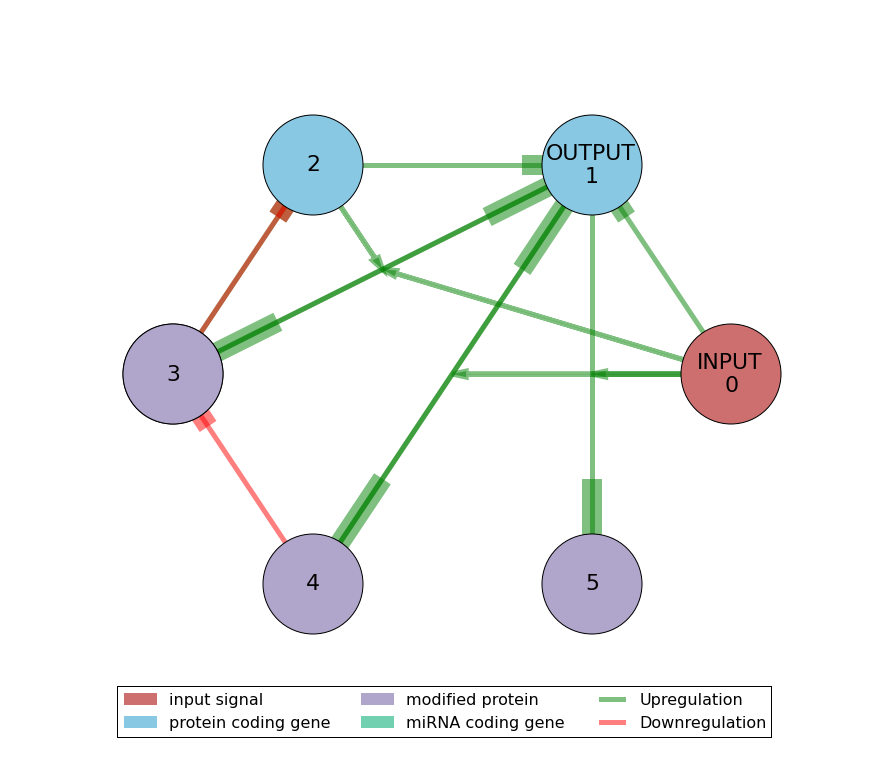

In [31]:
cell.show_topology(output_node=2)

In [32]:
times, states, key = cell.simulate(input_signal=[(0, 1), (200, 1)], input_node=0)

for state in states:
    plt.plot(times, state)
ax = plt.gca()

stiff equation solver failed


TypeError: 'NoneType' object is not iterable

In [33]:
cell.show_reactions()

Reaction Type           Reactants    Enzymes    Products
----------------------  -----------  ---------  ----------
modification            [2]          []         [3221]
catalytic_degradation   [4]          [3221]     []
catalytic_modification  [3221]       [0]        [2]
catalytic_modification  [2]          [0]        [3241]
catalytic_degradation   [3221]       [3241]     []
catalytic_modification  [3221]       [4]        [2]
catalytic_modification  [2]          [0]        [3256]
modification            [3241]       []         [2]


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
activation                     1                       0
activation                     1                       4
activation                     3                    3221
